In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pre_encoding_data.csv')

In [3]:
# Segregating categorical and numerical features

cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

#Convert cat_feats to categorical
for col in cat_feats:
    df[col] = df[col].astype('category')

# Removing Shipment Mode from cat_feats as it is the dependant variable
cat_feats.remove('ship_mode')

In [4]:
# Creating dummies for categorical features
for column in cat_feats:
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df,dummies], axis =1)
    df = df.drop(column, axis =1)

In [5]:
df

,ship_mode,per_pack_qty,line_qty,line_value,pack_price,unit_price,weight,freight,insurance,delay,...,"manu_site_Remedica, Limassol, Cyprus",manu_site_Roche Basel,manu_site_Roche Madrid,"manu_site_Standard Diagnostics, Korea","manu_site_Strides, Bangalore, India.","manu_site_Trinity Biotech, Plc","manu_site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",manu_site_bioLytical Laboratories,first_line_No,first_line_Yes
0,Air,30,19,551.00,29.00,0.97,13.000000,780.34,0.83,0,...,0,0,0,0,0,0,0,0,0,1
1,Air,240,1000,6200.00,6.20,0.03,358.000000,4521.50,9.31,0,...,0,0,0,0,0,0,0,0,0,1
2,Air,100,500,40000.00,80.00,0.80,171.000000,1653.78,60.09,0,...,0,0,0,0,0,0,0,0,0,1
3,Air,60,31920,127360.80,3.99,0.07,1855.000000,16007.06,191.34,0,...,0,0,0,0,0,0,0,0,0,1
4,Air,60,38000,121600.00,3.20,0.05,7590.000000,45450.08,182.68,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,Truck,60,166571,599655.60,3.60,0.06,25880.000000,46111.55,705.79,-16,...,0,0,0,0,0,0,0,0,1,0
9960,Truck,60,21072,137389.44,6.52,0.11,4426.000000,14734.92,161.71,6,...,0,0,0,0,0,0,0,0,1,0
9961,Truck,30,514526,5140114.74,9.99,0.33,4516.521007,0.00,5284.04,-6,...,0,0,0,0,0,0,0,0,1,0
9962,Truck,60,17465,113871.80,6.52,0.11,1392.000000,0.00,134.03,-36,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = df.drop(columns=['ship_mode'])
l = LabelEncoder()
y = l.fit_transform(df['ship_mode'])

In [7]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [9]:
inputs = tf.keras.Input(shape=(508,))
hide1 = tf.keras.layers.Dense(256, activation='relu')(inputs)
hide2 = tf.keras.layers.Dense(128, activation='relu')(hide1)
hide3 = tf.keras.layers.Dense(64, activation='relu')(hide2)
hide4 = tf.keras.layers.Dense(32, activation='relu')(hide3)
outputs = tf.keras.layers.Dense(4, activation='softmax')(hide4)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/100
187/187 [==============================] - 5s 11ms/step - loss: 0.4092 - accuracy: 0.8453 - val_loss: 0.2632 - val_accuracy: 0.8916
Epoch 2/100
187/187 [==============================] - 1s 6ms/step - loss: 0.2186 - accuracy: 0.9088 - val_loss: 0.2798 - val_accuracy: 0.8983
Epoch 3/100
187/187 [==============================] - 1s 5ms/step - loss: 0.1815 - accuracy: 0.9241 - val_loss: 0.2677 - val_accuracy: 0.9110
Epoch 4/100
187/187 [==============================] - 1s 5ms/step - loss: 0.1545 - accuracy: 0.9351 - val_loss: 0.2869 - val_accuracy: 0.8983
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.1339 - accuracy: 0.9436 - val_loss: 0.3055 - val_accuracy: 0.9050
Epoch 6/100
187/187 [==============================] - 1s 5ms/step - loss: 0.1208 - accuracy: 0.9508 - val_loss: 0.2779 - val_accuracy: 0.9064


In [10]:
LABEL_MAP = dict(zip(l.classes_, l.transform(l.classes_)))
print(LABEL_MAP)

{'Air': 0, 'Air Charter': 1, 'Ocean': 2, 'Truck': 3}


Test Set Accuracy: 89.72%


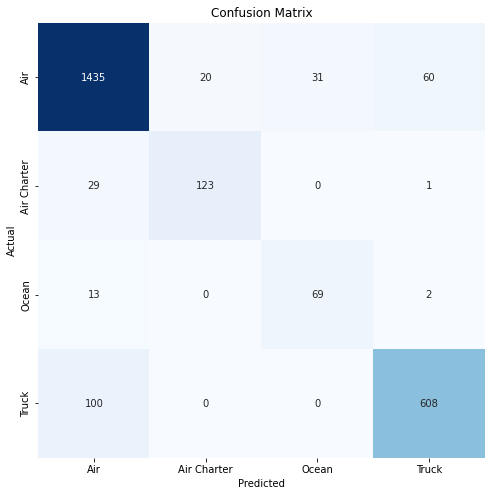

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.91      0.93      0.92      1546
 Air Charter       0.86      0.80      0.83       153
       Ocean       0.69      0.82      0.75        84
       Truck       0.91      0.86      0.88       708

    accuracy                           0.90      2491
   macro avg       0.84      0.85      0.85      2491
weighted avg       0.90      0.90      0.90      2491



In [11]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAP.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAP.values()), target_names=list(LABEL_MAP.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAP.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAP.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## Pipelined Model

In [13]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import pickle

#### Create Preprocessing Pipelines

In [14]:
df = pd.read_csv('pre_encoding_data.csv')

In [15]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

#Convert cat_feats to categorical
for col in cat_feats:
    df[col] = df[col].astype('str')

# Removing Shipment Mode from cat_feats as it is the dependant variable
cat_feats.remove('ship_mode')

In [16]:
X = df.drop(columns=['ship_mode'])
l = LabelEncoder()
y = l.fit_transform(df['ship_mode'])

In [17]:
numerical = Pipeline([('standard_scaler', StandardScaler())])
                            
categorical = Pipeline([('encode', OneHotEncoder()),('Dense',FunctionTransformer(csr_matrix.todense))])

preprocess = ColumnTransformer([('categorical', categorical, cat_feats),('numerical', numerical, num_feats)])

In [18]:
#Fit Preprocess to data
X = preprocess.fit_transform(X)

In [19]:
# save the preprocess
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=50)
X_train.shape

(7473, 508)

In [21]:
inputs = tf.keras.Input(shape=(508,))
hide1 = tf.keras.layers.Dense(256, activation='relu')(inputs)
hide2 = tf.keras.layers.Dense(128, activation='relu')(hide1)
hide3 = tf.keras.layers.Dense(64, activation='relu')(hide2)
hide4 = tf.keras.layers.Dense(32, activation='relu')(hide3)
outputs = tf.keras.layers.Dense(4, activation='softmax')(hide4)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/100
187/187 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.8070 - val_loss: 0.2571 - val_accuracy: 0.8923
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2179 - accuracy: 0.9169 - val_loss: 0.2242 - val_accuracy: 0.9144
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1697 - accuracy: 0.9376 - val_loss: 0.2415 - val_accuracy: 0.8957
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1348 - accuracy: 0.9490 - val_loss: 0.2025 - val_accuracy: 0.9231
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9620 - val_loss: 0.1917 - val_accuracy: 0.9278
Epoch 6/100
187/187 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9674 - val_loss: 0.1894 - val_accuracy: 0.9304
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 0.0820 - accuracy: 0.9689 - val_loss: 0.1972 - val_accuracy: 0.9331

Test Set Accuracy: 92.77%


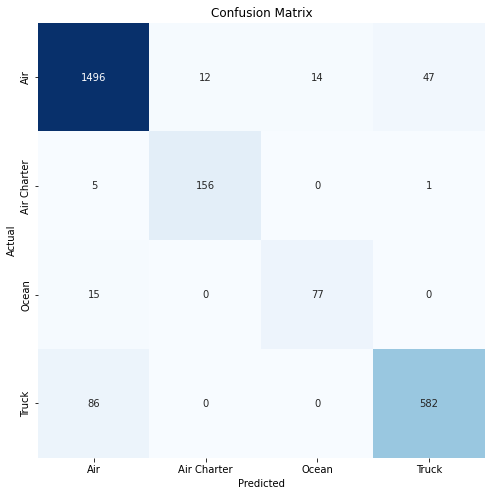

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.93      0.95      0.94      1569
 Air Charter       0.93      0.96      0.95       162
       Ocean       0.85      0.84      0.84        92
       Truck       0.92      0.87      0.90       668

    accuracy                           0.93      2491
   macro avg       0.91      0.91      0.91      2491
weighted avg       0.93      0.93      0.93      2491



In [22]:
# Transform preprocess and save for deployment
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAP.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAP.values()), target_names=list(LABEL_MAP.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAP.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAP.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [24]:
# Save the model
model.save('best_mode_transport')

INFO:tensorflow:Assets written to: best_mode_transport/assets
